### 1b. Preprocessing for english dataset and analysis

In [44]:
# one time setup only
#!pip install nltk pandas
#nltk.download('stopwords')

In [45]:
# libraries
from __future__ import print_function
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re

In [46]:
# load data
df = pd.read_csv('../datasets/english1970_data.csv', encoding="utf-8")
df.shape

(1970, 2)

In [47]:
# column label, convert to lowercase, split
df.columns = ['comment_eng','sarc_majority']
df['comment_eng'] = df['comment_eng'].str.lower().str.split()

In [48]:
# length of each data
df['length'] = df['comment_eng'].map(lambda text: len(text))
df.head()

,comment_eng,sarc_majority,length
0,"[more, people, will, bear, it, appears]",sarc,6
1,"[have, you, greed, of, money, people, want, to...",non-sarc,70
2,"[radio, television, lid, do, not, hear, the, p...",sarc,15
3,"[yes, you're, whipping, people, is, a, great, ...",non-sarc,17
4,"[ooi, government, national, front, you, people...",non-sarc,48


In [49]:
# apply stopwords
from nltk.corpus import stopwords

stop = stopwords.words('stoplist.engmalay(combine).txt')
df['comment_eng'] = df['comment_eng'].apply(lambda x: [item for item in x if item not in stop])
df['sarc_majority'] = df['sarc_majority']

In [50]:
# length of each data after stopword
df['length'] = df['comment_eng'].map(lambda text: len(text))
df.head()

,comment_eng,sarc_majority,length
0,"[people, bear, appears]",sarc,3
1,"[greed, money, people, want, big, spending, pl...",non-sarc,35
2,"[radio, television, lid, hear, promise, budget...",sarc,8
3,"[yes, you're, whipping, people, great, budget,...",non-sarc,10
4,"[ooi, government, national, front, people, awa...",non-sarc,22


In [51]:
df.dtypes

comment_eng      object
sarc_majority    object
length            int64
dtype: object

In [52]:
len (df)

1970

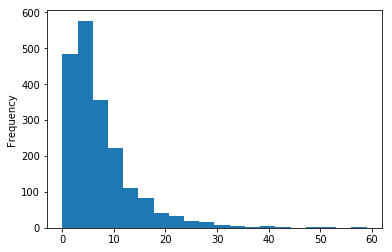

In [53]:
# plot histogram for length data frequency
df.length.plot(bins=20, kind='hist')

In [54]:
df.length.describe()

count    1970.000000
mean        6.988832
std         6.697777
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        59.000000
Name: length, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000114E052E2E8>,
      dtype=object)

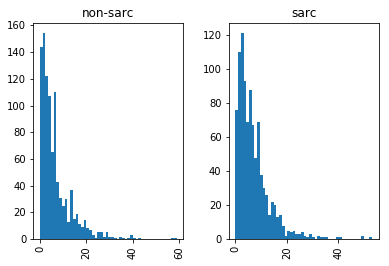

In [55]:
# plot histogram for length data frequency by type
df.hist(column='length', by='sarc_majority', bins=50)

In [56]:
# remove length column
df = df.drop('length', 1)

In [57]:
# save to 
df.to_csv('../datasets/english1970_data_post_stop.csv', index=False)
